# Lab 2: Avocado Prices

## Data Set-up

### 0. Import the Dataset

In [2]:
import pandas as pd
import numpy as np

df= pd.read_csv("avocado-updated-2020.csv")

In [3]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


### 1. Briefly describe the dataset. What information does it contain?

The Avocado dataset contains weekly avocado sales and pricing data from 2015 and on (across different US regions). Each row represents the sales information for a specific date, avocado type, and geographical market. This dataset allows analysts to study avocado sales trends over time.

Key columns:
- date: week that avocados were observed
- average_price: reflects a per unit (per avocado) cost even when multiple units are sold in bags
- total_volume: total # of avocados (units) sold
- 4046: small/medium hass (3-5 oz)
- 4225: large hass (8-0oz)
- 4770: extra large hass avocao (10-15 oz)
- total_bags: # of avocados sold in bags
- small_bags, large_bags, xlarge_bags: size of bags
- type: conventional or organic
- year: year observed
- geography: city where sales recorded

### 2. Clean the data in any way you see fit?

In [4]:
#rename lookup column to reflect size
df_clean = df.rename(columns={
    "date": "Date",
    "average_price": "Avg Price",
    "total_volume": "Total Vol",
    "4046": "Small (4046)",
    "4225": "Large (4225)",
    "4770": "XLarge (4770)",
    "total_bags": "Total Bags",
    "small_bags": "Small Bags",
    "large_bags": "Large Bags",
    "xlarge_bags": "XLarge Bags",
    "type": "Type",
    "year": "Year",
    "geography": "Geography"})

#drops any potential rows with missing values and removes duplicates
df_clean = df_clean.dropna()
df_clean = df_clean.drop_duplicates()

#adds new column for total sales of small/medium, large, and xl hass
df_clean["Total Sales"] = df_clean["Small (4046)"] + df_clean["Large (4225)"] + df_clean["XLarge (4770)"]

#changes small, large, xl, and total sales of avocados to integer (whole number)
int_cols = ["Small (4046)", "Large (4225)", "XLarge (4770)",
            "Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]
for col in int_cols:
    df_clean[col] = np.ceil(df_clean[col]).astype("int64")


df_clean.head()

,Date,Avg Price,Total Vol,Small (4046),Large (4225),XLarge (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Geography,Total Sales
0,2015-01-04,1.22,40873.28,2820,28288,50,9717,9187,530,0,conventional,2015,Albany,31156.82
1,2015-01-04,1.79,1373.95,58,154,0,1163,1163,0,0,organic,2015,Albany,211.30
2,2015-01-04,1.00,435021.49,364303,23822,83,46816,16708,30109,0,conventional,2015,Atlanta,388205.70
3,2015-01-04,1.76,3846.69,1501,939,0,1409,1072,337,0,organic,2015,Atlanta,2438.50
4,2015-01-04,1.08,788025.06,53988,552907,39996,141137,137147,3991,0,conventional,2015,Baltimore/Washington,646888.38


In [5]:
#unique values in Geography column
df_clean["Geography"].unique()


array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [6]:
# four lists (10, 2, 10, 32, 1)
major_regions = [
    "West", "Northeast", "South Central", "Southeast",
    "Midsouth", "Plains", "Great Lakes",
    "Northern New England", "West Tex/New Mexico"]

states = ["California", "South Carolina"]

metro_areas = [
    "Baltimore/Washington", "Buffalo/Rochester", "Cincinnati/Dayton",
    "Dallas/Ft. Worth", "Hartford/Springfield", "Miami/Ft. Lauderdale",
    "New Orleans/Mobile", "Phoenix/Tucson", "Raleigh/Greensboro",
    "Richmond/Norfolk"]

cities = [
    "Albany", "Atlanta", "Boise", "Boston", "Charlotte", "Chicago",
    "Columbus", "Denver", "Detroit", "Grand Rapids", "Harrisburg/Scranton",
    "Houston", "Indianapolis", "Jacksonville", "Las Vegas", "Los Angeles",
    "Louisville", "Nashville", "New York", "Orlando", "Philadelphia",
    "Pittsburgh", "Portland", "Roanoke", "Sacramento", "San Diego",
    "San Francisco", "Seattle", "Spokane", "St. Louis", "Syracuse", "Tampa"]

national = ["Total U.S."]

# 3) type map (used AI for help)
type_map = {}
type_map.update({g: "major_region" for g in major_regions})
type_map.update({g: "state"         for g in states})
type_map.update({g: "metro_area"    for g in metro_areas})
type_map.update({g: "city"          for g in cities})
type_map.update({g: "national"      for g in national})

# 4) region_type column
df_clean["region_type"] = df_clean["Geography"].map(type_map).fillna("other")

df_clean["major_geographical_region"] = df_clean["Geography"].where(df_clean["Geography"].isin(major_regions))
df_clean["state"]        = df_clean["Geography"].where(df_clean["Geography"].isin(states))
df_clean["metro_area"]   = df_clean["Geography"].where(df_clean["Geography"].isin(metro_areas))
df_clean["city"]         = df_clean["Geography"].where(df_clean["Geography"].isin(cities))
df_clean["national_lvl"] = df_clean["Geography"].where(df_clean["Geography"].isin(national))

df_clean

,Date,Avg Price,Total Vol,Small (4046),Large (4225),XLarge (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Geography,Total Sales,region_type,major_geographical_region,state,metro_area,city,national_lvl
0,2015-01-04,1.22,40873.28,2820,28288,50,9717,9187,530,0,conventional,2015,Albany,31156.82,city,NaN,NaN,NaN,Albany,NaN
1,2015-01-04,1.79,1373.95,58,154,0,1163,1163,0,0,organic,2015,Albany,211.30,city,NaN,NaN,NaN,Albany,NaN
2,2015-01-04,1.00,435021.49,364303,23822,83,46816,16708,30109,0,conventional,2015,Atlanta,388205.70,city,NaN,NaN,NaN,Atlanta,NaN
3,2015-01-04,1.76,3846.69,1501,939,0,1409,1072,337,0,organic,2015,Atlanta,2438.50,city,NaN,NaN,NaN,Atlanta,NaN
4,2015-01-04,1.08,788025.06,53988,552907,39996,141137,137147,3991,0,conventional,2015,Baltimore/Washington,646888.38,metro_area,NaN,NaN,Baltimore/Washington,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67545,97997,2618,1414879,906712,480192,27975,organic,2020,Total U.S.,168158.11,national,NaN,NaN,NaN,NaN,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352878,589062,19742,3790666,2197612,1531531,61525,conventional,2020,West,1961681.26,major_region,West,NaN,NaN,NaN,NaN
33042,2020-11-29,1.48,289961.27,13274,19342,637,256710,122607,134104,0,organic,2020,West,33251.35,major_region,West,NaN,NaN,NaN,NaN
33043,2020-11-29,0.67,822818.75,234689,80206,10544,497382,285765,210809,810,conventional,2020,West Tex/New Mexico,325436.79,major_region,West Tex/New Mexico,NaN,NaN,NaN,NaN


## Exercises

### 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [7]:
# filter
problem3 = df_clean.loc[
    (df_clean["Year"] == 2017)
    & (df_clean["Type"].str.lower() == "organic")
    & (df_clean["major_geographical_region"].notna())
    & (df_clean["Small (4046)"] > 0),
    ["Year", "Type", "major_geographical_region", "Small (4046)"]
]

# group by region and sum
problem3 = (
    problem3
    .groupby("major_geographical_region", as_index=False)["Small (4046)"]
    .sum()
    .sort_values(by="Small (4046)", ascending=False)
)
problem3


,major_geographical_region,Small (4046)
7,West,1870234
5,South Central,1717134
2,Northeast,925861
6,Southeast,285152
0,Great Lakes,202515
1,Midsouth,186422
4,Plains,168612
8,West Tex/New Mexico,110938
3,Northern New England,1269


#### Problem 3 Answer: West

### 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [8]:
#date column to datetime
df_clean["Date"] = pd.to_datetime(df_clean["Date"])

#month, day, and year into new columns
df_clean["month"] = df_clean["Date"].dt.month
df_clean["day"]   = df_clean["Date"].dt.day
df_clean["year"]  = df_clean["Date"].dt.year

#group by month and compute average total volume
monthly_avg = (
    df_clean.groupby("month")["Total Sales"]
    .mean()
    .sort_values(ascending=False)
)

monthly_avg.head()


month
5    713173.182184
2    712688.352465
6    651624.056938
1    644026.566269
4    640710.713462
Name: Total Sales, dtype: float64

#### Problem 4 Answer: May

### 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

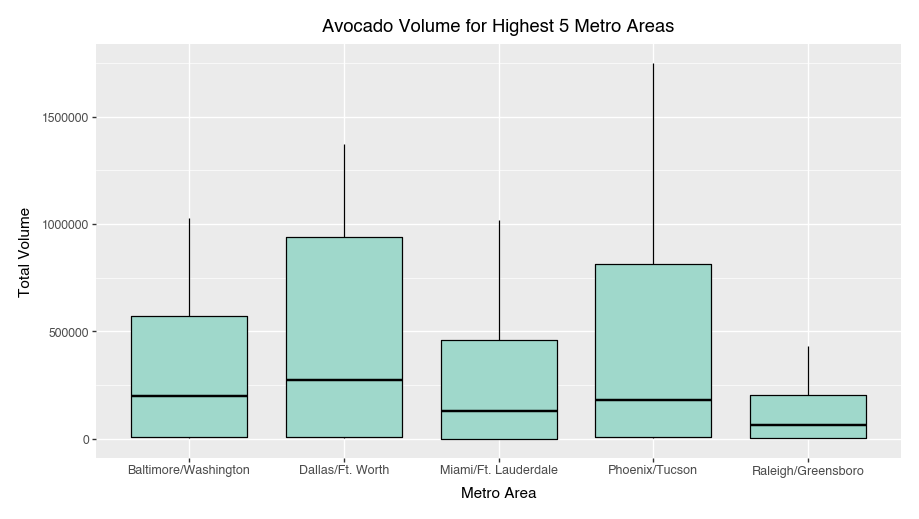

In [9]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, geom_bar, facet_wrap, scale_y_continuous, geom_point, geom_text

#filter metro area
metro_df = df_clean.loc[df_clean["region_type"] == "metro_area"]

#find top 5 metro areas by average total_volume
top5_metros = (
    metro_df.groupby("Geography")["Total Vol"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# only top five metros
top5_df = metro_df.loc[metro_df["Geography"].isin(top5_metros)]

#boxplot
( ggplot(top5_df, aes(x="Geography", y="Total Sales"))
    + geom_boxplot(fill="#9fd8cb", color="black")
    + labs(
        title="Avocado Volume for Highest 5 Metro Areas",
        x="Metro Area",
        y="Total Volume"
    )
    + theme(
        axis_text_x=element_text(size=9),
        figure_size=(9, 5)
    )
)

#### Problem 5 Answer: Dallas/Ft. Worth

## Pivoting

### 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [10]:
# ca regions
california_regions = ["Los Angeles", "San Francisco", "San Diego", "Sacramento"]

# filter dataset
df_california = df_clean.loc[df_clean["city"].isin(california_regions)].copy()

df_california


,Date,Avg Price,Total Vol,Small (4046),Large (4225),XLarge (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,...,Total Sales,region_type,major_geographical_region,state,metro_area,city,national_lvl,month,day,year
44,2015-01-04,0.85,2682159.95,1838000,524431,64226,255505,215572,36982,2951,...,2426655.90,city,NaN,NaN,NaN,Los Angeles,NaN,1,4,2015
45,2015-01-04,1.25,54495.54,47722,1724,0,5051,5051,0,0,...,49444.91,city,NaN,NaN,NaN,Los Angeles,NaN,1,4,2015
80,2015-01-04,1.05,430138.88,110694,270108,9738,39601,39601,0,0,...,390538.80,city,NaN,NaN,NaN,Sacramento,NaN,1,4,2015
81,2015-01-04,1.33,9213.49,3728,4328,0,1159,1159,0,0,...,8055.04,city,NaN,NaN,NaN,Sacramento,NaN,1,4,2015
82,2015-01-04,0.94,461607.33,244153,165300,15303,36853,30885,5595,374,...,424754.34,city,NaN,NaN,NaN,San Diego,NaN,1,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3304,2058,0,18171,18145,27,0,...,5360.72,city,NaN,NaN,NaN,Sacramento,NaN,11,29,2020
33019,2020-11-29,1.12,469356.72,104510,19989,7211,337648,189342,127702,20605,...,131708.91,city,NaN,NaN,NaN,San Diego,NaN,11,29,2020
33020,2020-11-29,1.95,25799.95,895,839,0,24068,9692,14376,0,...,1732.74,city,NaN,NaN,NaN,San Diego,NaN,11,29,2020
33021,2020-11-29,1.50,644141.37,128556,136719,5598,373271,159277,207761,6234,...,270870.88,city,NaN,NaN,NaN,San Francisco,NaN,11,29,2020


### 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [11]:
#region, type, avg price
avg_price_by_type = (
    df_california.groupby(["Geography", "Type"])["Avg Price"]
    .mean()
    .unstack() #seperate columns, used chat for help
    .reset_index()
)

#new column for the difference
avg_price_by_type["price_diff"] = (
    avg_price_by_type["organic"] - avg_price_by_type["conventional"]
)

#sort difference largest to smallest
avg_price_by_type = avg_price_by_type.sort_values(by="price_diff", ascending=False)

avg_price_by_type


Type,Geography,conventional,organic,price_diff
3,San Francisco,1.400490,2.119444,0.718954
2,San Diego,1.113856,1.798366,0.684510
1,Sacramento,1.295359,1.873856,0.578497
0,Los Angeles,1.047124,1.574902,0.527778


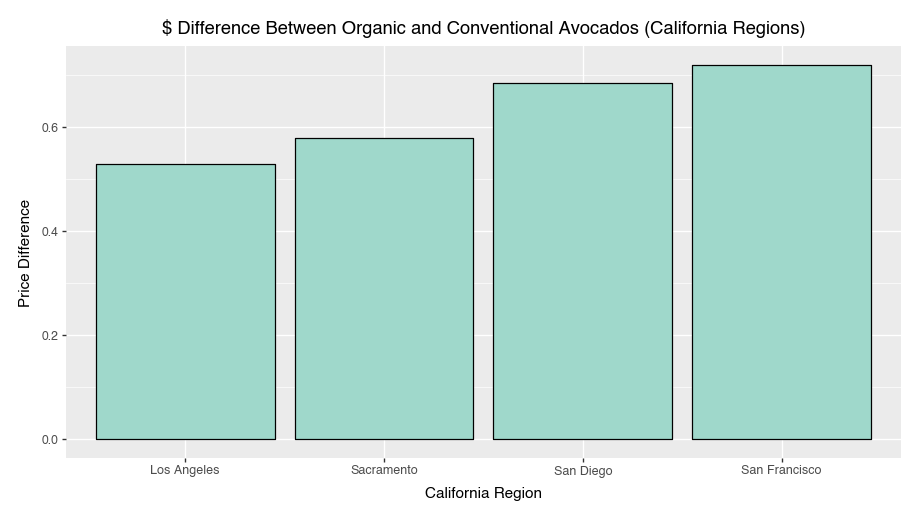

In [12]:
#barchart
(
ggplot(avg_price_by_type, aes(x="Geography", y="price_diff"))
+ geom_bar(stat="identity", fill="#9fd8cb", color="black")
+ labs(
    title="$ Difference Between Organic and Conventional Avocados (California Regions)",
    x="California Region",
    y="Price Difference"
)
+ theme(
    axis_text_x=element_text(size=9),
    figure_size=(9, 5)
)
)


#### Problem 7 Answer: San Francisco

### 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

/Users/oliviachoi/GSB 544/.venv/lib/python3.13/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_bar : Removed 5 rows containing missing values.


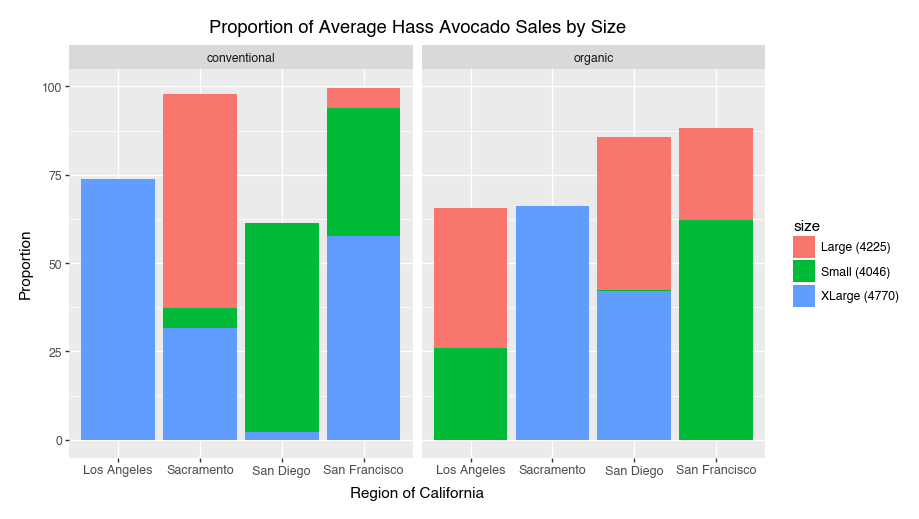

In [13]:
# avg props by region, type, and size
avg_sales = (
    df_california
    .groupby(["Geography", "Type"])
    [["Small (4046)", "Large (4225)", "XLarge (4770)"]]
    .mean()
    .reset_index()
)

# long format reshape (help from AI)
avg_sales_long = avg_sales.melt(
    id_vars=["Geography", "Type"],
    var_name="size",
    value_name="avg_sales"
)

# propd within each region and type (help for AI)
avg_sales_long["proportion"] = (
    avg_sales_long.groupby(["Geography", "Type"])["avg_sales"]
    .apply(lambda x: x / x.sum())
    .reset_index(drop=True)
)

# stacked bar plot
avg_sales_long["proportion"] = avg_sales_long["proportion"] * 100
(
ggplot(avg_sales_long, aes(x="Geography", y="proportion", fill="size"))
+ geom_bar(stat="identity")
+ facet_wrap("~Type")
+ labs(
    title="Proportion of Average Hass Avocado Sales by Size",
    x="Region of California",
    y="Proportion"
)
+ scale_y_continuous(breaks=[0, 25, 50, 75, 100], limits=[0,100])
+ theme(
    axis_text_x=element_text(size=9),
    figure_size=(9, 5)
)
)


## Using Outside Data

In [19]:
df_housing= pd.read_csv("lab2housing.csv")

In [22]:
#filter four cities
df_california_homes = df_housing[df_housing["RegionName"].isin(california_regions)]

df_california_homes = df_california_homes[["RegionName", "2019-12"]]
df_california_homes

,RegionName,2019-12
1,Los Angeles,2340.0
8,San Diego,2000.0
14,San Francisco,3500.0
29,Sacramento,1405.0


In [21]:
# filter four cities and avg avo price
df_avocado_city = (
    df_california[df_california["city"].isin(california_regions)]
    .groupby("city")[["Avg Price"]]
    .mean()
    .reset_index() #plz remember this bc city needs to be column not index
)
df_avocado_city


,city,Avg Price
0,Los Angeles,1.311013
1,Sacramento,1.584608
2,San Diego,1.456111
3,San Francisco,1.759967


In [17]:
# rename columns to match
df_california_homes = df_california_homes.rename(
    columns={"RegionName": "city", "2019-12": "avg_home_price"}
)

# merge avocado and housing datasets
df_please_work = pd.merge(
    df_avocado_city,
    df_california_homes,
    on="city"
)

df_please_work


,city,Avg Price,avg_home_price
0,Los Angeles,1.311013,2340.0
1,Sacramento,1.584608,1405.0
2,San Diego,1.456111,2000.0
3,San Francisco,1.759967,3500.0


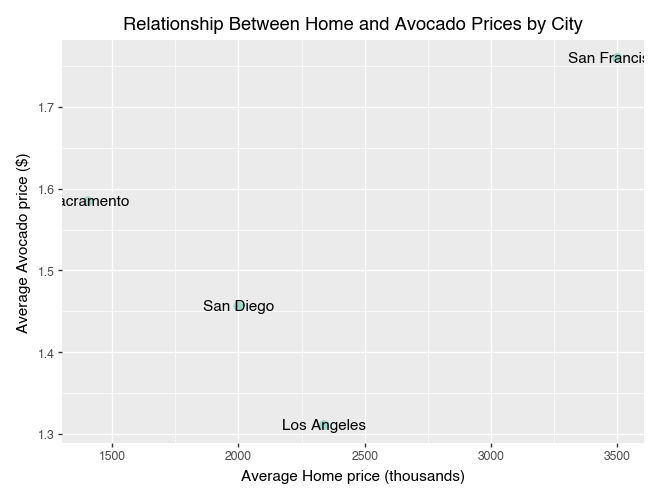

In [18]:
(
ggplot(df_please_work, aes(x="avg_home_price", y="Avg Price", label="city"))
+ geom_point(size=3, color="#9fd8cb")
+ geom_text()
+ labs(
    title="Relationship Between Home and Avocado Prices by City",
    x="Average Home price (thousands)",
    y="Average Avocado price ($)")
)


#### In our four California regions, we see no association between average housing prices and avocado prices. The housing dataset was created using median housing prices from Zillow. In essence, millennials are probably not living in San Francisco where both the housing and avocado prices are unfortunate. However, since there is no association, we cannot be clear as to the relationship between avocados and housing prices.